## Spam detection

1. Read dataset and make it in proper format.
2. Encode labels
3. Convert all cases to lower
4. Remove punctuations
5. Remove Stopwords
6. Check stats of messages
7. Convert all texts into vectors
8. Import classifier
9. Visualization( Spam words )
10. Train and test
11. Check the accuracy/confusion matrix. (accuracy=90.9844559585492227 )
12. Checking cross_val_score( 0.9689432989690723 )

In [1]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sms = pd.read_csv('messages.csv',encoding='latin-1')
sms.head()


,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
# Dataset has extra column 'subject'- Remove it
#We are considering the 'message' and 'label' feature here for further proceedings.

sms.drop(columns=['subject'],axis=1,inplace=True)

In [4]:
sms.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [5]:
print ('Shape = >',sms.shape)

Shape = > (2893, 2)


In [6]:
print ('ham and spam counts','\n',sms.label.value_counts())#imblanced data

ham and spam counts 
 0    2412
1     481
Name: label, dtype: int64


In [7]:
#New column for Length of message
sms['length'] = sms.message.str.len()
sms.head(5)

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [9]:
sms.head()

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


# FILTERCODE for feature sms['message']=X(which is a vector)

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [14]:
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
#sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sms)):
                    #^(not operator)-except a-zA-Z replace anything else with ''
    review = re.sub('[^a-zA-Z]', ' ', sms['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
corpus[:3]

['content length appl iss research center us million joint ventur appl comput inc institut system scienc nation univers singapor locat singapor look senior speech scientist success candid research expertis comput linguist includ natur languag process english chines statist languag model knowledg state art corpu base n gram languag model cach languag model part speech languag model requir text speech project leader success candid research expertis expertis two follow area comput linguist includ natur languag pars lexic databas design statist languag model text token normal prosod analysi substanti knowledg phonolog syntax semant chines requir knowledg acoust phonet speech signal process desir candid phd least year relev work experi technic msc degre least year experienc e strong softwar engin skill includ design implement product requir posit knowledg c c unix prefer unix c programm look experienc unix c programm prefer good industri experi join us break new frontier strong knowledg uni

# Creating the Bag of Words model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)#We have to take frequently occuring words(columns)
                    #So we are fixing=2500 columns.
                   #not considering features(words) occuring just once or twice.

X = cv.fit_transform(corpus).toarray()#corpus is derived from sms['message']

In [17]:
X #this can be used in ML model

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
X.shape 

(2893, 2500)

# Dummies

In [20]:
y=pd.get_dummies(sms['label'])
y=y.iloc[:,1].values


In [21]:
y[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

# Visualization

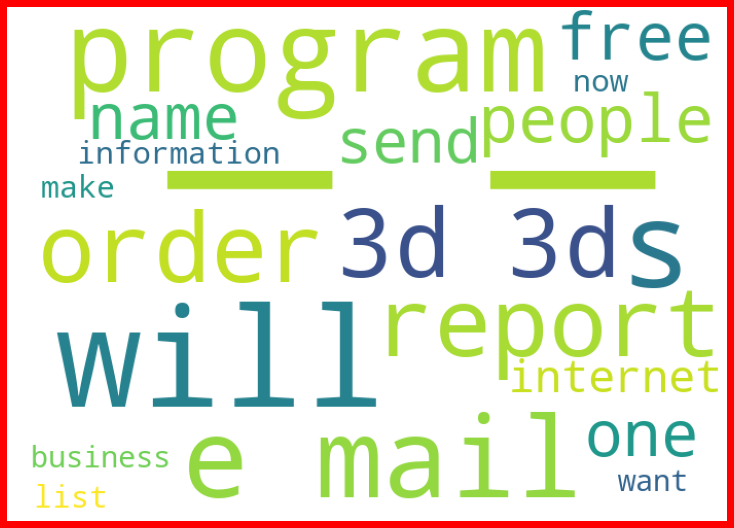

In [23]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = sms['message'][sms['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can clearly see, some of the words like "people, program,mail,one,want etc" are indication of spams.

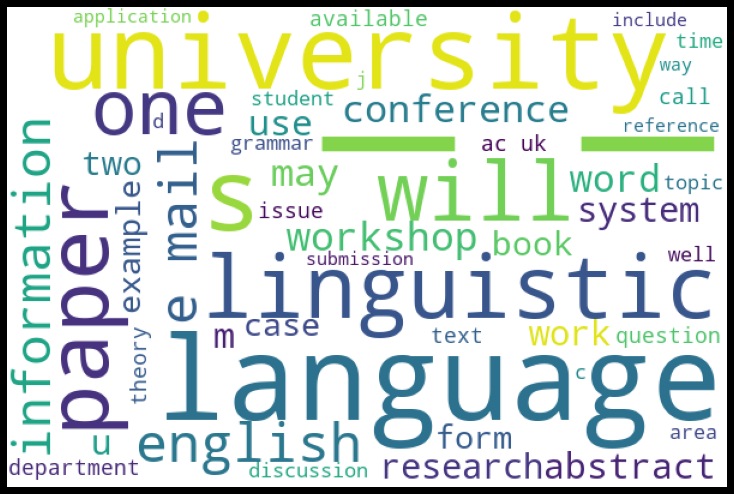

In [24]:
#Getting sense of loud words in ham 

hams = sms['message'][sms['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# train_test_split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Model building

In [27]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

# Predicting

In [28]:
y_pred=spam_detect_model.predict(X_test)

In [43]:
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

# Accuracy score

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9844559585492227

# classification_report

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       474
           1       0.95      0.96      0.96       105

    accuracy                           0.98       579
   macro avg       0.97      0.98      0.97       579
weighted avg       0.98      0.98      0.98       579



# confusion_matrix

In [38]:
from sklearn.metrics import confusion_matrix

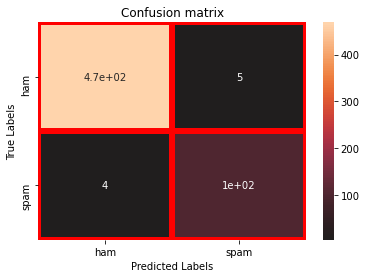

In [39]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [40]:
conf_mat

array([[469,   5],
       [  4, 101]], dtype=int64)

# cross_val_score

In [47]:
from sklearn.model_selection import cross_val_score

In [51]:

mnb=MultinomialNB()
cvs=cross_val_score(mnb,X,y,scoring='recall',cv=5)
print('cross_val_scores=  ',cvs.mean())


cross_val_scores=   0.9689432989690723
